# Sleep Health and Lifestyle

## Pertanyaan Bisnis
1. Apa saja jenis pekerjaan yang dilakukan oleh individu dalam kelompok umur yang memiliki langkah harian terendah dibandingkan dengan mereka yang berada dalam kelompok umur dengan langkah harian tertinggi?
2. Apa saja jenis pekerjaan yang dilakukan oleh individu dalam kelompok umur yang memiliki rata-rata waktu tidur lebih dari rata-rata waktu tidur populasi?
3. Apa kategori BMI yang paling banyak ditemukan di antara individu dengan pekerjaan di sektor kesehatan?
4. Apa sektor pekerjaan yang memiliki proporsi tertinggi individu yang mengalami insomnia?
5. Dari berbagai pekerjaan, yang manakah paling umum di antara individu dalam kategori "Overweight"?

## Import Library

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from sklearn.preprocessing import LabelEncoder
import zipfile


## Data Wragling

### Gathering Data

In [4]:
#!/bin/bash
!curl -L -o Sleep_health_and_lifestyle_dataset.zip\
"https://www.kaggle.com/api/v1/datasets/download/uom190346a/sleep-health-and-lifestyle-dataset"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100  2604  100  2604    0     0   2708      0 --:--:-- --:--:-- --:--:--  2708


In [ ]:
with zipfile.ZipFile(r"C:\Users\Ferry Pebriansyah\Documents\DBS\elite\Sleep_health_and_lifestyle_dataset.zip", "r") as zip_ref:
    zip_ref.extractall("dataset")


In [6]:
df = pd.read_csv('dataset/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


**Insight**

Dataset yang digunakan pada proyek ini merupakan data sintesis dan dapat di-download [di sini](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset). Dataset berisikan 374 baris data dan 13 kolom. Detail dari masing-masing kolom dapat diuraikan sebagai berikut:

Atribut                 | Keterangan
----------------------- | -----------------------------------------------------------------------------
person_id               | Nomor unik untuk mengenali setiap orang.
gender                  | Jenis kelamin orang tersebut (Laki-laki / Male atau Perempuan / Female).
age                     | Usia orang dalam tahun.
occupation              | Pekerjaan atau profesi yang dijalani oleh orang tersebut.
sleep_duration          | Jumlah jam tidur yang didapat orang per hari.
sleep_quality           | Penilaian subjektif tentang seberapa berkualitas tidurnya, dari 1 (tidak berkualitas) sampai 10 (sangat berkualitas).
physical_activity_level  | Rata-rata menit yang dihabiskan untuk bergerak atau berolahraga setiap hari.
stress_level            | Penilaian pribadi tentang seberapa stresnya orang tersebut, dari 1 (tidak stres) sampai 10 (sangat stres).
bmi_category            | Kategori BMI orang tersebut, seperti:
                        | - Berat Badan Kurang (Underweight)
                        | - Normal (Normal)
                        | - Kelebihan Berat Badan (Overweight)
                        | - Obesitas (Obesity)
blood_pressure          | Ukuran tekanan darah, ditulis sebagai tekanan sistolik di atas diastolik (misalnya, 120/80).
heart_rate              | Detak jantung saat istirahat, diukur dalam hitungan per menit.
daily_steps             | Jumlah langkah yang ditempuh orang setiap harinya.
sleep_disorder          | Apakah orang tersebut mengalami gangguan tidur atau tidak, seperti:
                        | - Tidak Ada (None)
                        | - Insomnia
                        | - Sleep Apnea






### Assessing Data

#### Check Data Summary

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Person ID,374.0,NaN,NaN,NaN,187.5,108.108742,1.0,94.25,187.5,280.75,374.0
Gender,374,2,Male,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,374.0,NaN,NaN,NaN,42.184492,8.673133,27.0,35.25,43.0,50.0,59.0
Occupation,374,11,Nurse,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sleep Duration,374.0,NaN,NaN,NaN,7.132086,0.795657,5.8,6.4,7.2,7.8,8.5
Quality of Sleep,374.0,NaN,NaN,NaN,7.312834,1.196956,4.0,6.0,7.0,8.0,9.0
Physical Activity Level,374.0,NaN,NaN,NaN,59.171123,20.830804,30.0,45.0,60.0,75.0,90.0
Stress Level,374.0,NaN,NaN,NaN,5.385027,1.774526,3.0,4.0,5.0,7.0,8.0
BMI Category,374,4,Normal,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood Pressure,374,25,130/85,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Insight**:

- Terdapat 2 kategori `Gender`.
- Rentang `Age` dalam dataset ini adalah dari 27 tahun hingga 59 tahun dengan rata-rata Usia 42 tahun.
- Terdapat 11 jenis `Occupation` atau pekerjaan yang didominasi oleh `Nurse`.
- Rata-rata `Sleep Duration` atau durasi tidur adalah 7.13 jam per malam.
- Rata-rata `Physical Activity Level` aktivitas fisik 59.17 menit setiap harinya.
- Terdapat 4  `BMI Category` dengan mayoritas responden dalam kategori Normal.



#### Check Unique Values

In [9]:
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].value_counts(dropna=False))
    print("-" * 20)

Gender
Male      189
Female    185
Name: count, dtype: int64
--------------------
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64
--------------------
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64
--------------------
Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
128/85     3
132/87     3
117/76     2
130/86     2
126/83     2
119/77     2
135/88     2
128/84     2
131/86     2
139/91     2
115/78     2
129/84     2
142/92     2
118/75     2
118/76     1
122/80     1
121/79     1
Name: count, dtype: int64
--------------------
Sleep Disorder
NaN            21

**Insight:**
- Kolom `Blood Pressure` bisa dilakukan feature engineering untuk memisahkan nilai upper (sistolik) dan lower (diastolik) dari nilai lengkap tekanan darahnya.
- Nampaknya nilai kosong dari kolom `Sleep Disorder` mengindikasikan bahwa orang tersebut tidak memiliki gangguan tidur.
- Beberapa insight sebenarnya bisa coba digali dari output di atas, seperti proporsi antara pria dan wanita yang hampir seimbang. Namun, perlu diingat bahwa data di atas masih memiliki data kembar yang jumlahnya belum kita ketahui. Jadi, insightnya akan kita gali lebih dalam ketika datanya sudah bersih saja pada tahap EDA.

#### Check Missing Values

In [10]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

**Insight:**
- Output ini merupakan kelanjutan dari pemeriksaan awal yang telah dilakukan dengan method `info()` sebelumnya.
- Nampaknya jumlah nilai kosong dari kolom `Sleep Disorder` terbilang cukup tinggi yaitu 219 dari 374 data (58%).

#### Check Duplicated Data

In [11]:
df.duplicated().sum()

np.int64(0)

**Insight:**
- Mengejutkan! Tidak ada data kembar yang terdeteksi dari pengecekan ini.
- Eits, hal ini masuk akal karena secara default data dianggap terduplikasi ketika memiliki nilai yang sama di setiap kolomnya. Nah, mengingat kolom `Person ID` sudah jelas memiliki nilai unik maka itulah alasan tidak ada yang terdeteksi kembar.

#### Check Outliers

In [12]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [13]:
numerical_columns = [x for x in df.select_dtypes(include='number').columns if x != 'Person ID']
numerical_columns

['Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps']

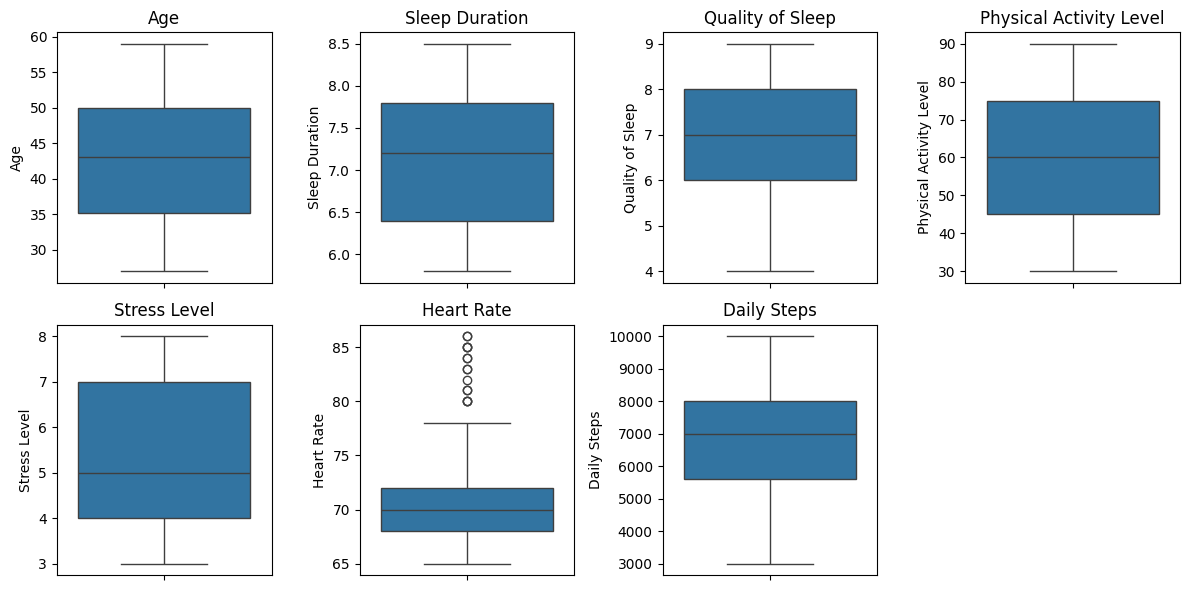

In [14]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**Insight:**
- Proporsi nilai di setiap kolom numerik terlihat aman atau tidak bias yang mencolok.
- Kolom `Heart Rate` nampaknya menjadi satu-satunnya kolom yang memiliki outliers. Namun, perlu diperhatikan bahwa nilai outlier dari kolom tersebut masih terbilang normal dan masuk akal. Ingatlah bahwa detak jantung orang dewasa itu memang sekitara 60-100 bpm.

### Cleaning Data

#### Column Renaming
Proses ini bertujuan untuk mengubah setiap nama kolom yang ada sesuai dengan standard penamaan Python. Perubahan nama sebenarnya preferensi dari masing-masing developer, tetapi tentu untuk developer yang sudah terbiasa dengan Python akan sangat menyukainya.

In [15]:
df_clean = df.copy()

df_clean.columns = df_clean.columns.str.lower().str.replace(' ', '_')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   person_id                374 non-null    int64  
 1   gender                   374 non-null    object 
 2   age                      374 non-null    int64  
 3   occupation               374 non-null    object 
 4   sleep_duration           374 non-null    float64
 5   quality_of_sleep         374 non-null    int64  
 6   physical_activity_level  374 non-null    int64  
 7   stress_level             374 non-null    int64  
 8   bmi_category             374 non-null    object 
 9   blood_pressure           374 non-null    object 
 10  heart_rate               374 non-null    int64  
 11  daily_steps              374 non-null    int64  
 12  sleep_disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


#### Dropping Irrelevant Columns
Proses ini bertujuan untuk menghapus kolom-kolom yang tidak relevan atau kurang berguna untuk analisa yang akan dilakukan. Kolom yang akan dihapus pada proyek ini adalah `person_id`.

In [16]:
df_clean.drop(columns=['person_id'], inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   374 non-null    object 
 1   age                      374 non-null    int64  
 2   occupation               374 non-null    object 
 3   sleep_duration           374 non-null    float64
 4   quality_of_sleep         374 non-null    int64  
 5   physical_activity_level  374 non-null    int64  
 6   stress_level             374 non-null    int64  
 7   bmi_category             374 non-null    object 
 8   blood_pressure           374 non-null    object 
 9   heart_rate               374 non-null    int64  
 10  daily_steps              374 non-null    int64  
 11  sleep_disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


#### Handling Missing Values
Proses ini bertujuan untuk menangani seluruh nilai kosong yang ada pada dataset, tentunya penanganan yang dilakukan disesuaikan dengan keadaan data supaya tidak ada informasi berguna yang terbuang. Mengingat kolom yang memiliki nilai kosong hanya `sleep_disorder` dan telah diketahui juga dari kekosongan nilainya maka akan ditangani dengan merubah nilainya supaya lebih sesuai dengan keadaan sebenarnya.

In [17]:
df_clean.fillna({'sleep_disorder': 'No Issue'}, inplace=True)

df_clean.isnull().sum()

gender                     0
age                        0
occupation                 0
sleep_duration             0
quality_of_sleep           0
physical_activity_level    0
stress_level               0
bmi_category               0
blood_pressure             0
heart_rate                 0
daily_steps                0
sleep_disorder             0
dtype: int64

#### Handling Incorrect Values
Proses ini bertujuan untuk menangani nilai-nilai yang kurang akurat, seperti adanya typo, ketidakkonsistenan, atau hal-hal serupa lainnya. Terlihat dari output `.value_counts()` bahwa terdapat nilai dari kolom `bmi_category` dengan makna yang sama, yaitu **Normal** dan **Normal Weight**. Bisa jadi, keduanya memang sama atau salah satunya memang ada yang salah input.

Oleh karena itu, mari kita cek deskripsi kedua nilai dari masing-masing kategori tersebut. Jika memang hampir sama, maka cukup dibuat konsisten saja salah satunya.

In [18]:
df_clean[df_clean.bmi_category == 'Normal'].describe()

,age,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,heart_rate,daily_steps
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,38.482051,7.393846,7.661538,57.692308,5.128205,68.728205,6887.179487
std,7.561666,0.732080,0.946130,21.896139,1.605074,2.293643,1372.630008
min,28.000000,6.000000,6.000000,30.000000,3.000000,65.000000,5000.000000
25%,32.000000,7.150000,7.000000,30.000000,4.000000,68.000000,5000.000000
50%,37.000000,7.500000,8.000000,60.000000,5.000000,70.000000,8000.000000
75%,42.000000,7.800000,8.000000,75.000000,6.000000,70.000000,8000.000000
max,54.000000,8.500000,9.000000,90.000000,8.000000,75.000000,10000.000000


In [19]:
df_clean[df_clean.bmi_category == 'Normal Weight'].describe()

,age,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,heart_rate,daily_steps
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,38.380952,7.333333,7.428571,60.333333,5.190476,71.285714,6766.666667
std,7.921339,0.585093,1.398979,16.758083,1.503963,4.616740,1722.304658
min,29.000000,6.400000,5.000000,35.000000,3.000000,65.000000,4000.000000
25%,32.000000,6.900000,7.000000,50.000000,4.000000,68.000000,6000.000000
50%,37.000000,7.300000,8.000000,60.000000,6.000000,70.000000,7000.000000
75%,40.000000,7.800000,8.000000,70.000000,6.000000,73.000000,7500.000000
max,56.000000,8.200000,9.000000,90.000000,7.000000,80.000000,10000.000000


In [20]:
df_clean['bmi_category'] = df_clean['bmi_category'].replace('Normal Weight', 'Normal')
df_clean['bmi_category'].value_counts()

bmi_category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

**Insight**:

Pada akhirnya kateori `Normal Weight` diubah menjadi `Normal` dikarenakan setelah dicek rata-ratanya nilainya hampir sama.

#### Correcting Data Types
Proses ini bertujuan untuk merubah tipe data yang belum sesuai dari kolom-kolom dataset yang ada. Opsi yang akan dilakukan adalah merubah kolom yang bertipe ordinal menjadi `category`.

In [21]:
category_order = ['Normal', 'Overweight', 'Obese']

df_clean['bmi_category'] = pd.Categorical(df_clean['bmi_category'], categories=category_order, ordered=True)
df_clean['bmi_category'].dtype

CategoricalDtype(categories=['Normal', 'Overweight', 'Obese'], ordered=True, categories_dtype=object)

#### Feature Engineering
Proses ini bertujuan untuk membuat fitur baru berdasarkan fitur yang sudah ada untuk digunakan dalam analisa yang akan dilakukan. Dalam proyek ini, kita akan memisahkan nilai sistolik dan diastolik dari nilai lengkap tekanan darahnya.

In [22]:
df_clean = pd.concat([df_clean, df_clean['blood_pressure'].str.split('/', expand=True)], axis=1).drop('blood_pressure', axis=1)
df_clean = df_clean.rename(columns={0: 'blood_pressure_upper', 1: 'blood_pressure_lower'})
df_clean['blood_pressure_upper'] = df_clean['blood_pressure_upper'].astype(int)
df_clean['blood_pressure_lower'] = df_clean['blood_pressure_lower'].astype(int)

df_clean.head()

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,heart_rate,daily_steps,sleep_disorder,blood_pressure_upper,blood_pressure_lower
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Issue,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Issue,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Issue,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


Setelah memisahkan nilai tekanan darah antara sistolik dan diastoliknya, nampaknya kita memiliki peluang untuk membuat fitur baru untuk mengategorikal tekanan darah seseorang tergolong normal atau tidak berdasarkan nilai tersebut.

In [23]:
# source: https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

def categorize_blood_pressure(systolic, diastolic):
    if systolic < 90 or diastolic < 60:
        return "Low"
    elif 90 <= systolic < 120 and diastolic < 80:
        return "Normal"
    elif 120 <= systolic < 130 and diastolic < 80:
        return "Elevated"
    elif 130 <= systolic < 140 or 80 <= diastolic < 90:
        return "Hypertension Stage 1"
    elif 140 <= systolic < 180 or 90 <= diastolic < 120:
        return "Hypertension Stage 2"
    else:
        return "Hypertensive Crisis"

df_clean['blood_pressure_category'] = df_clean.apply(lambda row: categorize_blood_pressure(row['blood_pressure_upper'], row['blood_pressure_lower']), axis=1)
df_clean['blood_pressure_category'].value_counts()

blood_pressure_category
Hypertension Stage 1    261
Hypertension Stage 2     71
Normal                   41
Elevated                  1
Name: count, dtype: int64

In [24]:
category_order = ["Low", "Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2", "Hypertensive Crisis"]
df_clean['blood_pressure_category'] = pd.Categorical(df_clean['blood_pressure_category'], categories=category_order, ordered=True)

df_clean['blood_pressure_category'].dtype

CategoricalDtype(categories=['Low', 'Normal', 'Elevated', 'Hypertension Stage 1',
                  'Hypertension Stage 2', 'Hypertensive Crisis'],
, ordered=True, categories_dtype=object)

In [25]:
df_clean

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,heart_rate,daily_steps,sleep_disorder,blood_pressure_upper,blood_pressure_lower,blood_pressure_category
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Issue,126,83,Hypertension Stage 1
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Issue,125,80,Hypertension Stage 1
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Issue,125,80,Hypertension Stage 1
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,Hypertension Stage 2
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,Hypertension Stage 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,Hypertension Stage 2
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,Hypertension Stage 2
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,Hypertension Stage 2
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,Hypertension Stage 2


#### Handling Duplicated Data
Proses ini bertujuan untuk menghapus data kembar yang ada di dataset supaya analisa yang dilakukan ke depannya terbebas dari bias. Mengingat dataset yang dimiliki sudah cukup bersih, maka proses penghapusan duplikasi data dapat dilakukan dengan mudah.

In [26]:
df_clean.duplicated().sum()

np.int64(242)

In [27]:
df_clean.drop_duplicates(inplace=True)
df_clean.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis (EDA)

In [28]:
df_eda = df_clean.copy()

### Univariate Analysis

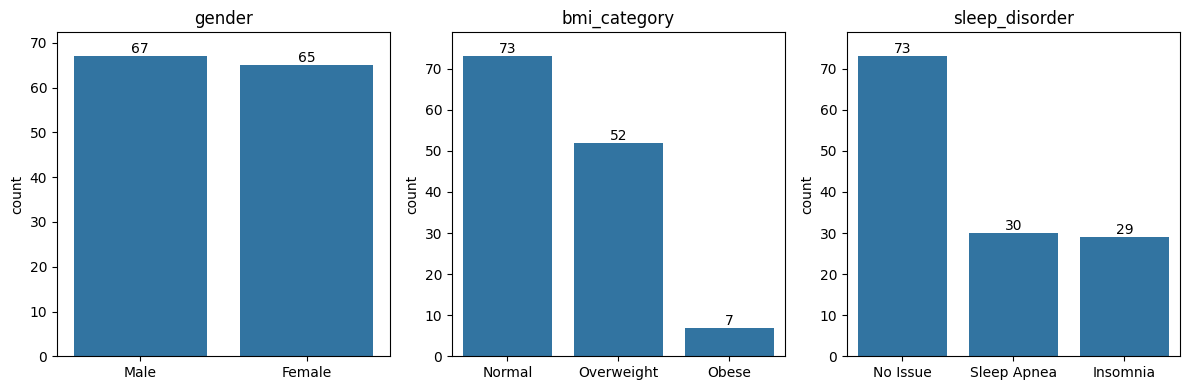

In [ ]:
categorical_columns = df_eda.select_dtypes(include=['object', 'category']).columns
filtered_categorical_columns = categorical_columns.drop(['occupation', 'blood_pressure_category'])

plt.figure(figsize=(12, 4))
for i, col in enumerate(filtered_categorical_columns):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=df_eda[col])
    plt.title(col)
    plt.xlabel('')
    plt.ylim(0,df_eda[col].value_counts().max()*1.08)
    for p in plt.gca().patches:
        plt.gca().annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

**Insight:**
- Proporsi antara pria dan wanita memang benar-benar seimbang.
- Terdapat 7 orang yang mengalami obesitas, diikuti 52 orang yang kelebihan berat badan.
- Persentase orang yang mengalami gangguan tidur mencapai 44% (59 dari 132).

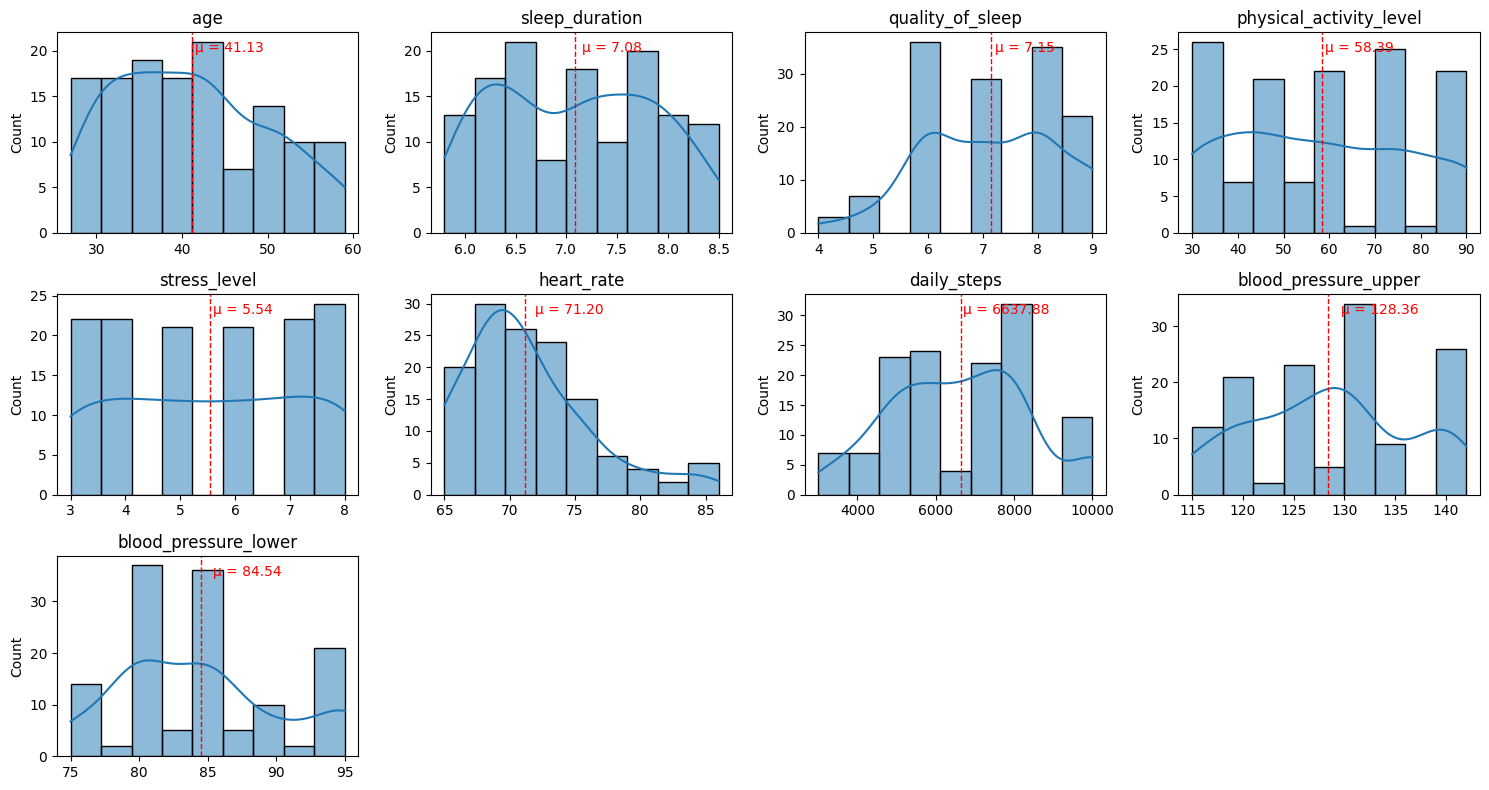

In [30]:
numerical_columns = df_eda.select_dtypes(include='number').columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df_eda[col], kde=True)  # Use histplot for histograms
    plt.axvline(df_eda[col].mean(), color='r', linestyle='dashed', linewidth=1)
    plt.text(df_eda[col].mean()*1.01, plt.ylim()[1] * 0.9, f'μ = {df_eda[col].mean():.2f}', color='r')
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

**Insight:**
- Tidak ada satupun kolom numerik yang terdistribusi normal.
- Kolom `heart_rate` menjadi yang paling mencolok karena terdistribusi right-skewed.
- Secara rata-rata populasi, durasi tidur telah mencapai durasi tidur yang direkomendasikan (7-8 jam).

### Bivariate Analysis

In [31]:
def groupby_mean(data, col, *requested_type):
  """Groups data by a specified column and calculates the mean of all other columns.

  Args:
    data: The input DataFrame.
    col: The column to group by.

  Returns:
    A DataFrame with the grouped data and mean values, or None if an error occurs.
  """
  try:
    grouped = data.groupby(col, observed=False)[data.select_dtypes(list(requested_type)).columns].mean()
    grouped = grouped.dropna()
    display(grouped.T)
  except KeyError:
    print(f"Error: Column '{col}' not found in the DataFrame.")
    return None
  except Exception as e:
    print(f"An unexpected error occurred: {e}")
    return None

In [32]:
for col in categorical_columns:
  print(f'{"-"*20}{col}{"-"*20}')
  groupby_mean(df_eda, col, 'number')
  print()

--------------------gender--------------------


gender,Female,Male
age,45.830769,36.567164
sleep_duration,7.152308,7.014925
quality_of_sleep,7.446154,6.865672
physical_activity_level,59.061538,57.746269
stress_level,4.969231,6.089552
heart_rate,70.507692,71.880597
daily_steps,6707.692308,6570.149254
blood_pressure_upper,129.938462,126.835821
blood_pressure_lower,86.123077,83.000000



--------------------occupation--------------------


occupation,Accountant,Doctor,Engineer,Lawyer,Manager,Nurse,Sales Representative,Salesperson,Scientist,Software Engineer,Teacher
age,39.363636,33.291667,45.181818,39.133333,45.0,48.241379,28.0,43.333333,33.5,30.000000,39.800000
sleep_duration,7.136364,7.050000,7.800000,7.380000,6.9,6.965517,5.9,6.422222,6.0,6.500000,6.720000
quality_of_sleep,7.909091,6.750000,8.136364,7.733333,7.0,7.068966,4.0,6.000000,5.0,6.000000,6.800000
physical_activity_level,57.727273,58.125000,51.909091,69.000000,55.0,73.172414,30.0,45.000000,41.0,44.000000,45.000000
stress_level,4.818182,6.541667,4.227273,5.133333,5.0,5.758621,8.0,7.000000,7.0,6.333333,5.000000
heart_rate,69.090909,71.708333,68.181818,71.400000,75.0,72.862069,85.0,72.000000,78.5,77.333333,69.133333
daily_steps,6890.909091,7050.000000,5945.454545,7073.333333,5500.0,7558.620690,3000.0,6000.000000,5350.0,5066.666667,5780.000000
blood_pressure_upper,118.363636,123.083333,125.318182,130.200000,125.0,136.275862,140.0,130.000000,129.5,128.666667,129.733333
blood_pressure_lower,77.363636,80.750000,81.227273,85.200000,82.0,91.793103,90.0,85.000000,85.5,84.333333,85.466667



--------------------bmi_category--------------------


bmi_category,Normal,Overweight,Obese
age,37.698630,46.576923,36.428571
sleep_duration,7.342466,6.742308,6.900000
quality_of_sleep,7.506849,6.769231,6.285714
physical_activity_level,57.698630,60.115385,52.857143
stress_level,5.246575,5.903846,5.857143
heart_rate,69.506849,71.846154,84.142857
daily_steps,6853.424658,6780.769231,3328.571429
blood_pressure_upper,123.246575,134.153846,138.714286
blood_pressure_lower,80.547945,89.423077,89.857143



--------------------sleep_disorder--------------------


sleep_disorder,Insomnia,No Issue,Sleep Apnea
age,41.620690,39.452055,44.733333
sleep_duration,6.679310,7.300000,6.943333
quality_of_sleep,6.517241,7.520548,6.866667
physical_activity_level,48.103448,58.712329,67.566667
stress_level,6.034483,5.178082,5.933333
heart_rate,72.206897,69.547945,74.266667
daily_steps,5755.172414,6861.643836,6946.666667
blood_pressure_upper,131.724138,124.356164,134.866667
blood_pressure_lower,86.413793,81.547945,90.000000



--------------------blood_pressure_category--------------------


blood_pressure_category,Normal,Elevated,Hypertension Stage 1,Hypertension Stage 2
age,37.800000,41.0,39.153846,50.32
sleep_duration,7.326667,7.3,7.084615,6.92
quality_of_sleep,8.000000,8.0,7.021978,7.08
physical_activity_level,62.466667,70.0,52.703297,76.20
stress_level,4.333333,6.0,5.637363,5.88
heart_rate,68.200000,72.0,70.989011,73.76
daily_steps,7226.666667,6200.0,6270.329670,7640.00
blood_pressure_upper,115.933333,121.0,127.274725,140.08
blood_pressure_lower,75.533333,79.0,83.406593,94.28


**Insight:**
- Statistik berdasarkan jenis kelamin:
  - Tidak ada perbedaan yang signifikan.
  - Wanita memiliki kualitas tidur yang sedikit lebih baik dan lebih aktif bergerak dibandingkan pria.
  - Pria nampaknya sedikit lebih stress dibandingkan wanita.
- Statistik berdasarkan pekerjaan:
  - Engineer menjadi pekerjaan dengan durasi dan kualitas tidur paling baik, sedangkan Sales Representative sebaliknya.
  - Engineer juga menjadi pekerjaan dengan stress level terkecil, sedangkan Sales Representative sebaliknya.
- Statistik berdasarkan BMI:
  - Mereka yang obesitas memiliki kualitas tidur terburuk, detak jantung yang lebih tinggi, dan lebih mageran (langkahnya lebih sedikit).
- Statistik berdasarkan gangguan tidur:
  - Mereka yang mengidap gangguan tidur cenderung lebih stres dan kualitas tidurnya lebih buruk dari mereka yang tidak mengidap gangguan tidur.
- Statistik berdasarkan tekanan darah:
  - Mereka yang bertekanan darah tinggi rata-rata berusia 40+.

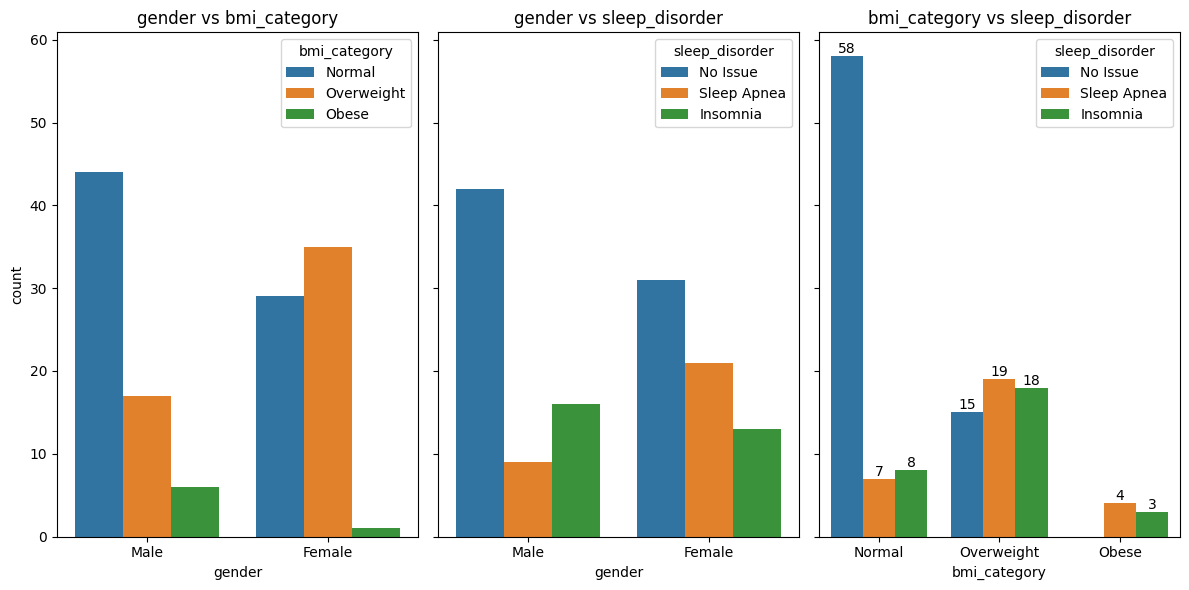

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)

pairs = [(filtered_categorical_columns[i], filtered_categorical_columns[j])
         for i in range(len(filtered_categorical_columns))
         for j in range(i + 1, len(filtered_categorical_columns))]

for subplot_index, (col1, col2) in enumerate(pairs[:3]):
    ax = axes[subplot_index]
    count_data = sns.countplot(x=col1, hue=col2, data=df_eda, ax=ax)
    ax.set_title(f'{col1} vs {col2}')

for p in count_data.patches:
    if p.get_height() > 0:
        ax.annotate(int(p.get_height()),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')


plt.tight_layout()
plt.show()

**Insight:**
- Wanita lebih banyak yang kelebihan berat badan dibandingkan pria, tetapi prialah yang cenderung mengalami obesitas.
- Proporsi antara pria dan wanita yang mengalami Insomnia tidak jauh berbeda dan jumlah wanita lebih banyak yang mengalami Sleep Apnea dibandingkan pria.
- Gangguan tidur lebih banyak terjadi kepada mereka yang memiliki kelebihan berat badan.

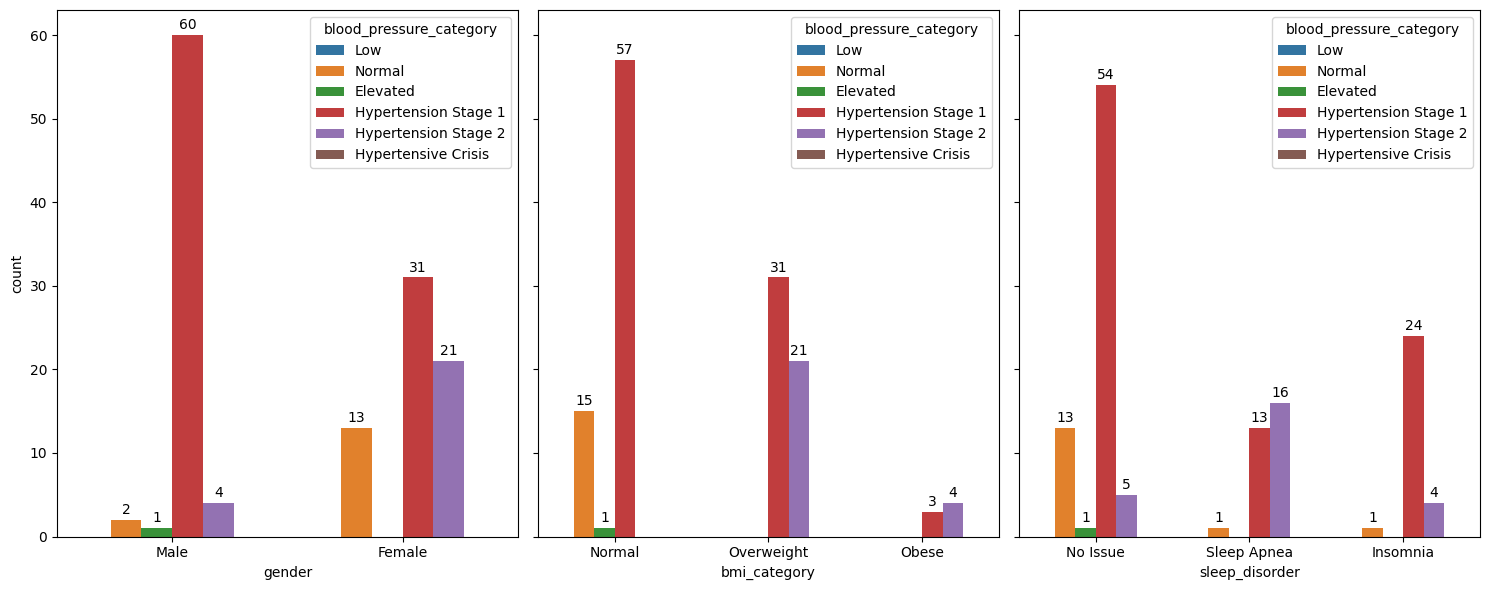

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
for i, col in enumerate(filtered_categorical_columns[:3]):
    count_data = sns.countplot(data=df_clean, hue='blood_pressure_category', x=col, ax=axes[i])

    for p in count_data.patches:
        if p.get_height() > 0 : #check for data that have no value
            axes[i].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                            ha='center', va='bottom', xytext=(0, 2), textcoords='offset points')
plt.tight_layout()
plt.show()

**Insight:**
- Pria lebih condong mengidap hipertensi tahap 1 dan wanita mengidap hipertensi tahap 2.
- Mereka yang memiliki kelebihan berat badan condong mengidap hipertensi tahap 2.
- Mereka yang mengalami gangguan tidur juga condong mengidap hipertensi tahap 2.

### Multivariate Analysis

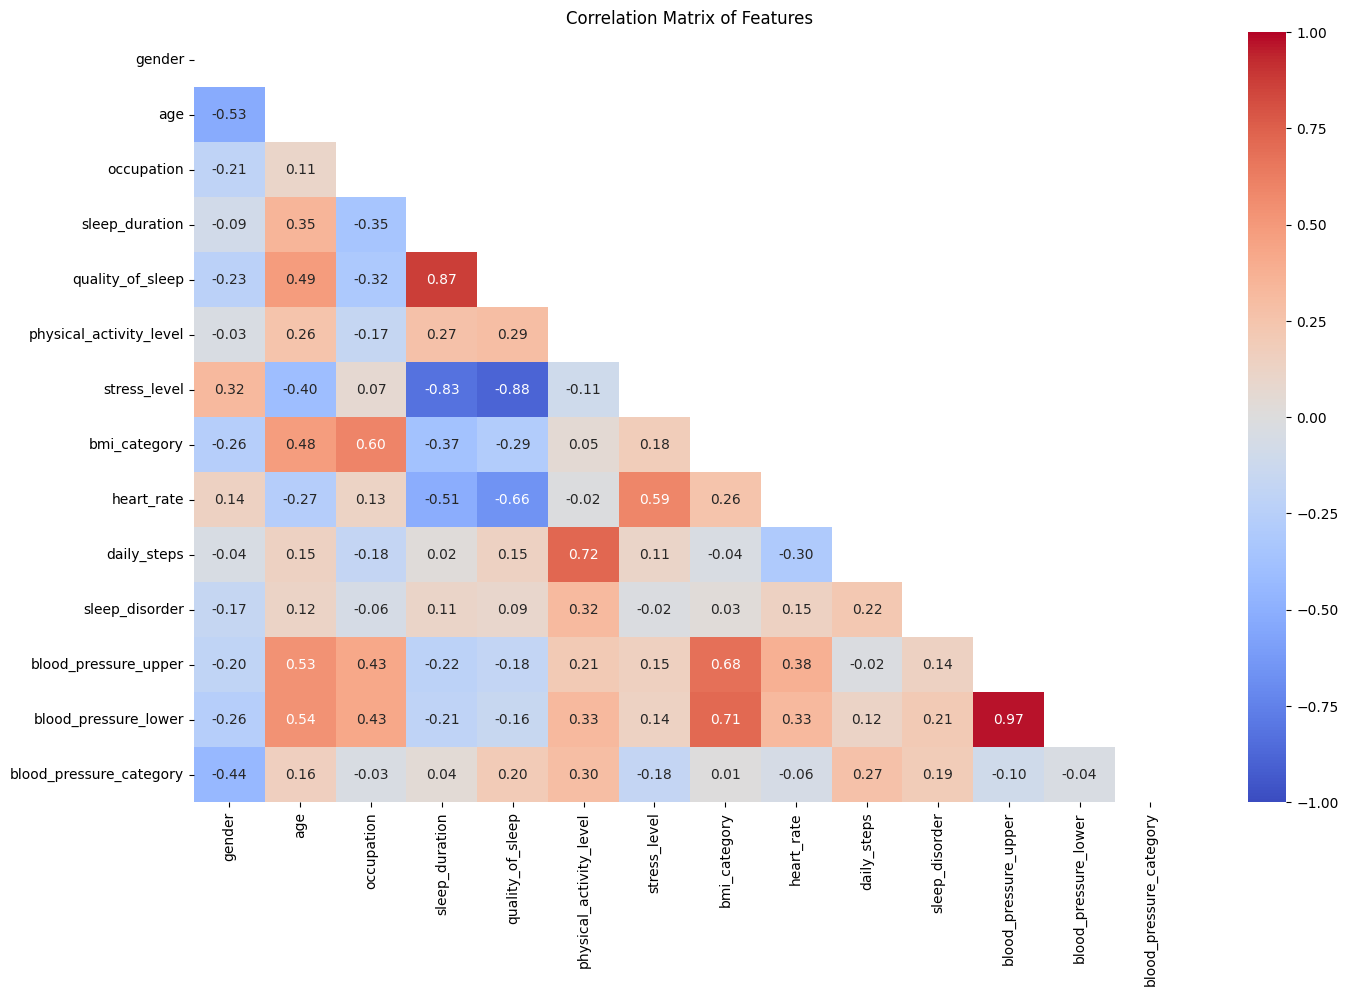

In [ ]:
le = LabelEncoder()
# Buat dictionary encoder
encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_eda[col] = le.fit_transform(df_eda[col])
    encoders[col] = le


correlation_matrix = df_eda.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

**Insight:**
- Semakin lama durasi tidurnya maka semakin berkualitas tidurnya (hubungan kuat positif).
- Semakin lama durasi tidurnya maka semakin berkurang stressnya (hubungan kuat negatif).
- Semakin tua usianya maka semakin berkurang stressnya (hubungan lemah positif).
- Ada hubungan positif yang cukup kuat antara kategori BMI dengan pekerjaan dan tekanan darah.
- Ada hubungan negatif yang lemah antara kategori tekanan darah dengan jenis kelamin.

## Visualization

### Apa saja jenis pekerjaan yang dilakukan oleh individu dalam kelompok umur yang memiliki langkah harian terendah dibandingkan dengan mereka yang berada dalam kelompok umur dengan langkah harian tertinggi?

In [ ]:
def create_age_groups(dataframe, age_column, bin_size=4):
    """
    Creates age groups in the DataFrame based on dynamic bins.

    Parameters:
        dataframe (pd.DataFrame): The input DataFrame containing age data.
        age_column (str): The column name representing age.
        bin_size (int): The size of the age bins (default is 4).

    Returns:
        pd.DataFrame: The DataFrame with an additional column for age groups.
    """
    # Determine the min and max age values
    min_age = dataframe[age_column].min()
    max_age = dataframe[age_column].max()

    # Adjust min_age to the nearest lower multiple of bin_size
    if min_age % bin_size != 0:
        min_age = min_age - (min_age % bin_size)

    # Adjust max_age to the nearest upper multiple of bin_size
    if max_age % bin_size != 0:
        max_age = max_age + (bin_size - (max_age % bin_size))

    # Create dynamic bins and labels
    bins = np.arange(min_age, max_age + bin_size, bin_size)
    labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins) - 1)]

    # Create age categories in DataFrame
    dataframe['age_group'] = pd.cut(dataframe[age_column], bins=bins, labels=labels, right=False)
    return dataframe

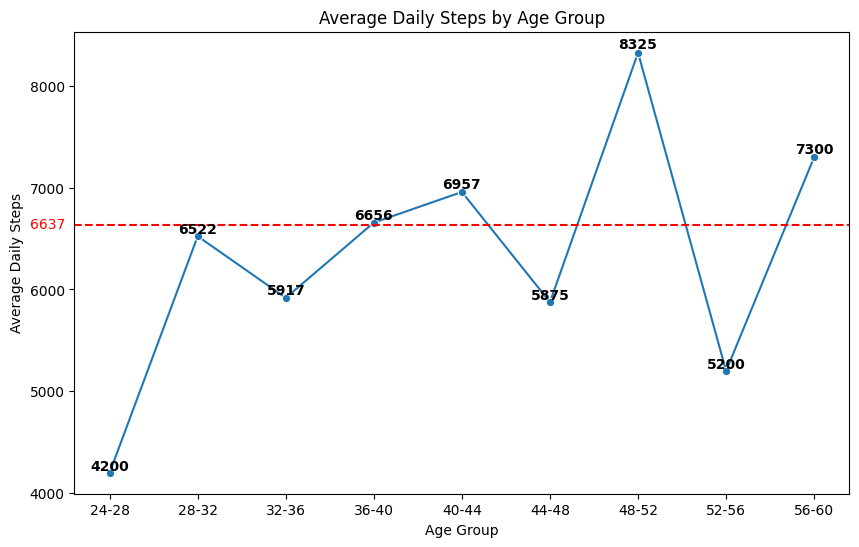

In [ ]:
# Create age categories
df_visual = create_age_groups(df_eda, 'age')

# Calculate the average daily steps for each age group
average_steps_by_age = df_visual.groupby('age_group', observed=False)['daily_steps'].mean().reset_index()

# Visualize the average daily steps by age group
plt.figure(figsize=(10, 6))
sns.lineplot(x='age_group', y='daily_steps', data=average_steps_by_age, marker='o')

for index, row in average_steps_by_age.iterrows():
    plt.text(row['age_group'], row['daily_steps'] * 1.005, int(row["daily_steps"]),
            horizontalalignment='center', size='medium', color='black', weight='semibold')

# Calculate overall mean of daily steps
overall_mean = df_visual['daily_steps'].mean()

# Add horizontal line for overall mean
plt.axhline(y=overall_mean, color='r', linestyle='--')

# Annotate the mean value on the y-axis
plt.text(x=-0.5, y=overall_mean, s=int(overall_mean),
        color='r', ha='right', va='center')

plt.title('Average Daily Steps by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Daily Steps')
plt.show()

In [38]:
display(df_visual[df_visual['age_group'] == '24-28']['occupation'].value_counts())
display(df_visual[df_visual['age_group'] == '48-52']['occupation'].value_counts())

occupation
9    1
Name: count, dtype: int64

occupation
5    12
1     2
2     2
Name: count, dtype: int64

**Insight:**
- Terlihat kelompok usia paling mageran atau kurang aktif bergerak itu yang rentang usianya 24-28 tahun.
- Kelompok usia paling aktif bergerak itu yang rentang usianya 48-52 tahun.

### Apa saja jenis pekerjaan yang dilakukan oleh individu dalam kelompok umur yang memiliki rata-rata waktu tidur lebih dari rata-rata waktu tidur populasi?

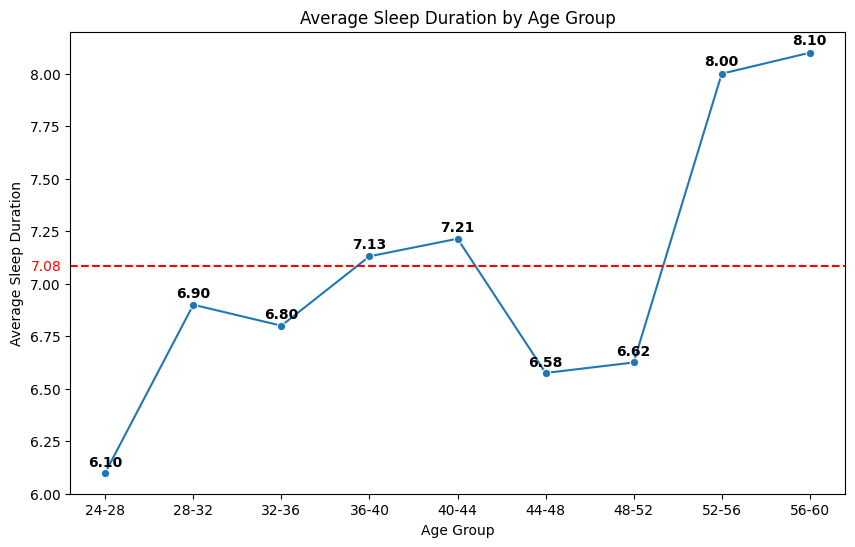

In [ ]:
# Calculate the average daily sleep_duration for each age group
average_sleep_duration_by_age = df_visual.groupby('age_group', observed=False)['sleep_duration'].mean().reset_index()

# Visualize the average daily sleep_duration by age group
plt.figure(figsize=(10, 6))
sns.lineplot(x='age_group', y='sleep_duration', data=average_sleep_duration_by_age, marker='o')

for index, row in average_sleep_duration_by_age.iterrows():
    plt.text(row['age_group'], row['sleep_duration'] * 1.005, f'{row["sleep_duration"]:.2f}',
            horizontalalignment='center', size='medium', color='black', weight='semibold')

# Calculate overall mean of daily steps
overall_mean = df_visual['sleep_duration'].mean()

# Add horizontal line for overall mean
plt.axhline(y=overall_mean, color='r', linestyle='--')

# Annotate the mean value on the y-axis
plt.text(x=-0.5, y=overall_mean, s=f'{overall_mean:.2f}',
        color='r', ha='right', va='center')

plt.title('Average Sleep Duration by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Sleep Duration')
plt.show()

In [40]:
question_two = df_visual[df_visual['age_group'].isin(['36-40', '40-44', '52-56', '56-60'])]['occupation'].value_counts()
question_two.to_frame().style.background_gradient(cmap='coolwarm')

,count
occupation,
2,16
3,14
5,12
0,9
10,7
7,5
1,1


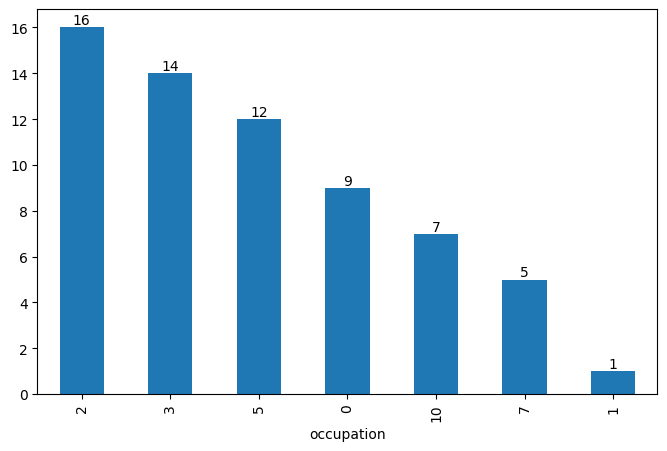

In [41]:
question_two.plot(kind='bar', figsize=(8, 5))

for i, v in enumerate(question_two):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

**Insight:**
- Kelompok usia yang rata-rata durasi tidurnya sesuai rekomendasi adalah kelompok usia 36-44 dan 52-60.
- Dari kelompok usia yang dimaksud tersebut, kebanyakan di antaranya bekerja sebagai Engineer, Pengacara, dan Suster.

### Apa kategori BMI yang paling banyak ditemukan di antara individu dengan pekerjaan di sektor kesehatan?

In [42]:
healthcare_occupations = ['Doctor', 'Nurse']
healthcare_df = df_clean[df_clean['occupation'].isin(healthcare_occupations)]

bmi_counts = healthcare_df['bmi_category'].value_counts()
bmi_counts

bmi_category
Normal        29
Overweight    22
Obese          2
Name: count, dtype: int64

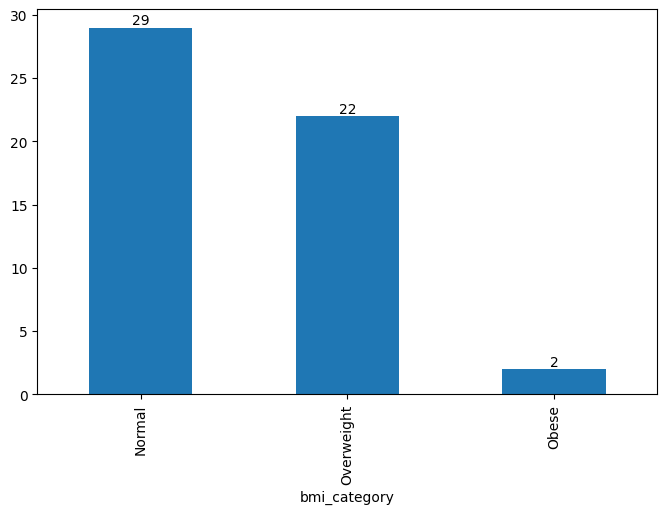

In [43]:
bmi_counts.plot(kind='bar', figsize=(8, 5))

for i, v in enumerate(bmi_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

In [44]:
healthcare_pivot = healthcare_df.pivot_table(index='bmi_category', columns='occupation', aggfunc='size', fill_value=0, observed=False)
healthcare_pivot

occupation,Doctor,Nurse
bmi_category,,
Normal,22,7
Overweight,0,22
Obese,2,0


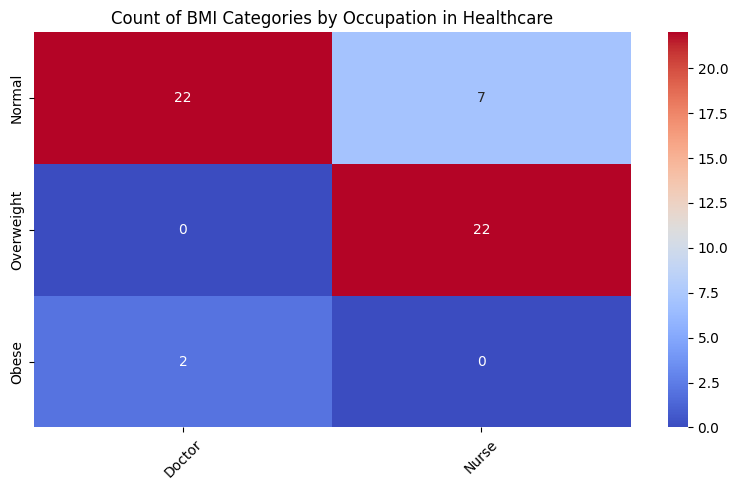

In [45]:
plt.figure(figsize=(8, 5))
sns.heatmap(healthcare_pivot, annot=True, fmt='d', cmap='coolwarm')
plt.title('Count of BMI Categories by Occupation in Healthcare')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- Jumlah pekerja di sektor kesehatan yang memiliki berat badan berlebih mencapai 22 orang dan 2 orang mengalami obesitas.
- Yang mengalami berat badan berlebih adalah para suster. Sedangkan yang mengalami obesitas adalah para dokter.

In [47]:
df_clean.head()

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,heart_rate,daily_steps,sleep_disorder,blood_pressure_upper,blood_pressure_lower,blood_pressure_category
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Issue,126,83,Hypertension Stage 1
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Issue,125,80,Hypertension Stage 1
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,Hypertension Stage 2
5,Male,28,Software Engineer,5.9,4,30,8,Obese,85,3000,Insomnia,140,90,Hypertension Stage 2
6,Male,29,Teacher,6.3,6,40,7,Obese,82,3500,Insomnia,140,90,Hypertension Stage 2


### Apa sektor pekerjaan yang memiliki proporsi tertinggi individu yang mengalami insomnia?

In [ ]:
import plotly.express as px
import plotly.io as pio

# Filter for individuals with insomnia
insomnia_df = df_clean[df_clean['sleep_disorder'] == 'Insomnia']

# Count the number of individuals with insomnia by occupation
insomnia_counts = insomnia_df['occupation'].value_counts().reset_index()
insomnia_counts.columns = ['occupation', 'count']

# Create a treemap
fig = px.treemap(insomnia_counts,
                path=['occupation'],
                values='count',
                title='Treemap of Occupations with Individuals Experiencing Insomnia')
fig.update_traces(hovertemplate='label=%{label}<br>total=%{value}<extra></extra>')

pio.renderers.default = 'browser'  # <- ganti renderer ke browser

fig.show()


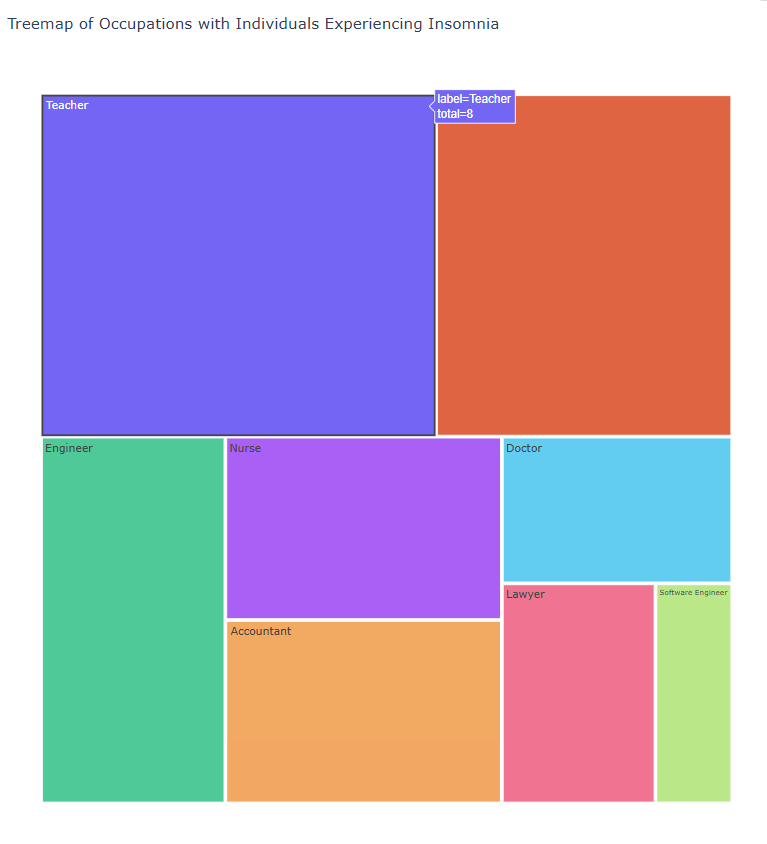

**Insight:**
- Sektor pekerjaan yang paling banyak mengalami insomnia adalah pendidikan sebanyak 10 orang guru.
- Kemudiaan diikuti sektor sales sebanyak 6 orang dan Engineer sebanyak 5 orang.

### Dari berbagai pekerjaan, yang manakah paling umum di antara individu dalam kategori "Overweight"?

In [ ]:
# Filter for individuals with insomnia
insomnia_df = df_clean[df_clean['bmi_category'] == 'Overweight']

# Count the number of individuals with insomnia by occupation
insomnia_counts = insomnia_df['occupation'].value_counts().reset_index()
insomnia_counts.columns = ['occupation', 'count']

# Create a treemap
fig = px.treemap(insomnia_counts,
                path=['occupation'],
                values='count',
                title='Treemap of Occupations with Individuals Experiencing Insomnia')
fig.update_traces(hovertemplate='label=%{label}<br>total=%{value}<extra></extra>')

pio.renderers.default = 'browser'  # <- ganti renderer ke browser

fig.show()


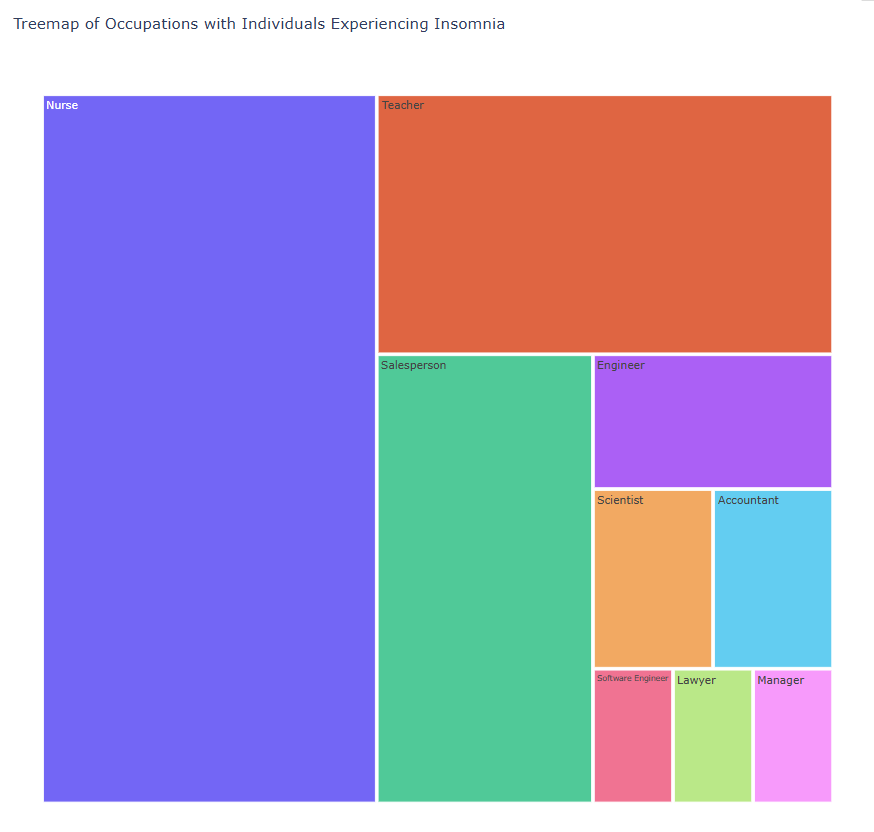

**Insight:**
- Pekerjaan yang individunya memiliki berat badan berlebih terbanyak adalah suster sejumlah 22 orang.
- Kemudian diikuti oleh 11 guru dan 9 salesperson.

In [67]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 0 to 366
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   gender                   132 non-null    int64   
 1   age                      132 non-null    int64   
 2   occupation               132 non-null    int64   
 3   sleep_duration           132 non-null    float64 
 4   quality_of_sleep         132 non-null    int64   
 5   physical_activity_level  132 non-null    int64   
 6   stress_level             132 non-null    int64   
 7   bmi_category             132 non-null    int64   
 8   heart_rate               132 non-null    int64   
 9   daily_steps              132 non-null    int64   
 10  sleep_disorder           132 non-null    int64   
 11  blood_pressure_upper     132 non-null    int64   
 12  blood_pressure_lower     132 non-null    int64   
 13  blood_pressure_category  132 non-null    int64   
 14  age_group      

In [68]:
df_visual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 0 to 366
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   gender                   132 non-null    int64   
 1   age                      132 non-null    int64   
 2   occupation               132 non-null    int64   
 3   sleep_duration           132 non-null    float64 
 4   quality_of_sleep         132 non-null    int64   
 5   physical_activity_level  132 non-null    int64   
 6   stress_level             132 non-null    int64   
 7   bmi_category             132 non-null    int64   
 8   heart_rate               132 non-null    int64   
 9   daily_steps              132 non-null    int64   
 10  sleep_disorder           132 non-null    int64   
 11  blood_pressure_upper     132 non-null    int64   
 12  blood_pressure_lower     132 non-null    int64   
 13  blood_pressure_category  132 non-null    int64   
 14  age_group      

In [69]:
# Buat salinan agar tidak merusak data asli
df_visual = df_eda.copy()

# Kembalikan semua kolom kategorikal
for col in encoders:
    df_visual[col] = encoders[col].inverse_transform(df_eda[col])

# Tampilkan contoh hasil
print(df_visual.head())

  gender  age            occupation  sleep_duration  quality_of_sleep  \
0   Male   27     Software Engineer             6.1                 6   
1   Male   28                Doctor             6.2                 6   
3   Male   28  Sales Representative             5.9                 4   
5   Male   28     Software Engineer             5.9                 4   
6   Male   29               Teacher             6.3                 6   

   physical_activity_level  stress_level bmi_category  heart_rate  \
0                       42             6   Overweight          77   
1                       60             8       Normal          75   
3                       30             8        Obese          85   
5                       30             8        Obese          85   
6                       40             7        Obese          82   

   daily_steps sleep_disorder  blood_pressure_upper  blood_pressure_lower  \
0         4200       No Issue                   126                  

In [70]:
df_visual.head()

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,heart_rate,daily_steps,sleep_disorder,blood_pressure_upper,blood_pressure_lower,blood_pressure_category,age_group
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Issue,126,83,Hypertension Stage 1,24-28
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Issue,125,80,Hypertension Stage 1,28-32
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,Hypertension Stage 2,28-32
5,Male,28,Software Engineer,5.9,4,30,8,Obese,85,3000,Insomnia,140,90,Hypertension Stage 2,28-32
6,Male,29,Teacher,6.3,6,40,7,Obese,82,3500,Insomnia,140,90,Hypertension Stage 2,28-32


### Export Dataset Akhir
Dataset akhir ini di-ekspor untuk digunakan sebagai dataset pada dashboard Streamlit yang dikembangkan.

In [71]:
df_visual.to_csv('sleep_health.csv', index=False)